In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('climate_action_data.csv')

In [84]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nSummary statistics before cleaning:")
print(df.describe(include='all'))
print("\nMissing values before cleaning:")
print(df.isnull().sum())

First 5 rows of the dataset:
  Sensor_ID      Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  1/1/2025            36.22    6.98           21.3        50.4   
1  SEN-1001  1/2/2025            76.55    5.03           23.5        34.3   
2  SEN-1002  1/3/2025            61.24    6.52           21.9        54.6   
3  SEN-1003  1/4/2025            51.91    6.62             24        48.7   
4  SEN-1004  1/5/2025            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                            36                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  

In [85]:
# Replace 'error' with NaN
df.replace('error', np.nan, inplace=True)
print("\nDataset after replacing 'error' with NaN (first 5 rows):")
print(df.head())

# Convert columns to numeric where appropriate, coercing errors for columns that had 'error'
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData types after converting error-prone columns to numeric:")
df.info()
print("\nMissing values after converting 'error' to NaN and numeric conversion:")
print(df.isnull().sum())


Dataset after replacing 'error' with NaN (first 5 rows):
  Sensor_ID      Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  1/1/2025            36.22    6.98           21.3        50.4   
1  SEN-1001  1/2/2025            76.55    5.03           23.5        34.3   
2  SEN-1002  1/3/2025            61.24    6.52           21.9        54.6   
3  SEN-1003  1/4/2025            51.91    6.62             24        48.7   
4  SEN-1004  1/5/2025            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                            36                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       

In [86]:
# For numeric columns, fill with the mean
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# For 'Crop_Type', fill with the mode (most frequent value)
# Check if 'Crop_Type' column exists and has missing values before filling
if 'Crop_Type' in df.columns and df['Crop_Type'].isnull().any():
    df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)
elif 'Crop_Type' not in df.columns:
    print("\nWarning: 'Crop_Type' column not found.")


print("\nMissing values after filling NaN values:")
print(df.isnull().sum())


Missing values after filling NaN values:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


C:\Users\franc\AppData\Local\Temp\ipykernel_16764\2727226361.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\franc\AppData\Local\Temp\ipykernel_16764\2727226361.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [87]:
df.drop_duplicates(inplace=True)
print(f"\nShape of DataFrame after dropping duplicates: {df.shape}")


Shape of DataFrame after dropping duplicates: (802, 10)


In [88]:
df.drop_duplicates(inplace=True)
print(f"\nShape of DataFrame after dropping duplicates: {df.shape}")


Shape of DataFrame after dropping duplicates: (802, 10)


In [89]:
# Convert 'Date' column to datetime objects
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
else:
    print("\nWarning: 'Date' column not found for datetime conversion.")


print("\nDataset Information after cleaning and type conversion:")
df.info()
print("\nCleaned dataset (first 5 rows):")
print(df.head())


Dataset Information after cleaning and type conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      802 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               802 non-null    float64       
 3   Soil_pH                        802 non-null    float64       
 4   Temperature(C)                 802 non-null    float64       
 5   Humidity(%)                    802 non-null    float64       
 6   Crop_Type                      802 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  802 non-null    float64       
 8   Irrigation_Recommended(mm)     802 non-null    float64       
 9   Drone_Image_ID                 802 non-null    object        
dtypes: datetime64[ns](1), float64(6), 

In [90]:
df.to_csv('cleaned_precision_agriculture_data_v2.csv', index=False)
print("\nCleaned dataset exported to 'cleaned_precision_agriculture_data_v2.csv'")


Cleaned dataset exported to 'cleaned_precision_agriculture_data_v2.csv'


In [91]:
print("\nDescriptive Statistics of the cleaned dataset:")
print(df.describe())


Descriptive Statistics of the cleaned dataset:
                                Date  Soil_Moisture(%)     Soil_pH  \
count                            798        802.000000  802.000000   
mean   2026-02-04 07:45:33.834586624         44.761896    6.248838   
min              2025-01-01 00:00:00         10.350000    4.520000   
25%              2025-07-19 06:00:00         26.947500    5.330000   
50%              2026-02-03 12:00:00         45.230000    6.255639   
75%              2026-08-23 18:00:00         62.555000    7.080000   
max              2027-03-11 00:00:00         79.980000    8.000000   
std                              NaN         20.460681    1.021572   

       Temperature(C)  Humidity(%)  Fertilizer_Recommended(kg/ha)  \
count      802.000000   802.000000                     802.000000   
mean        26.460253    60.037627                      87.469200   
min         18.000000    30.000000                      30.000000   
25%         22.300000    46.025000           


Visualizing distributions of numeric variables:


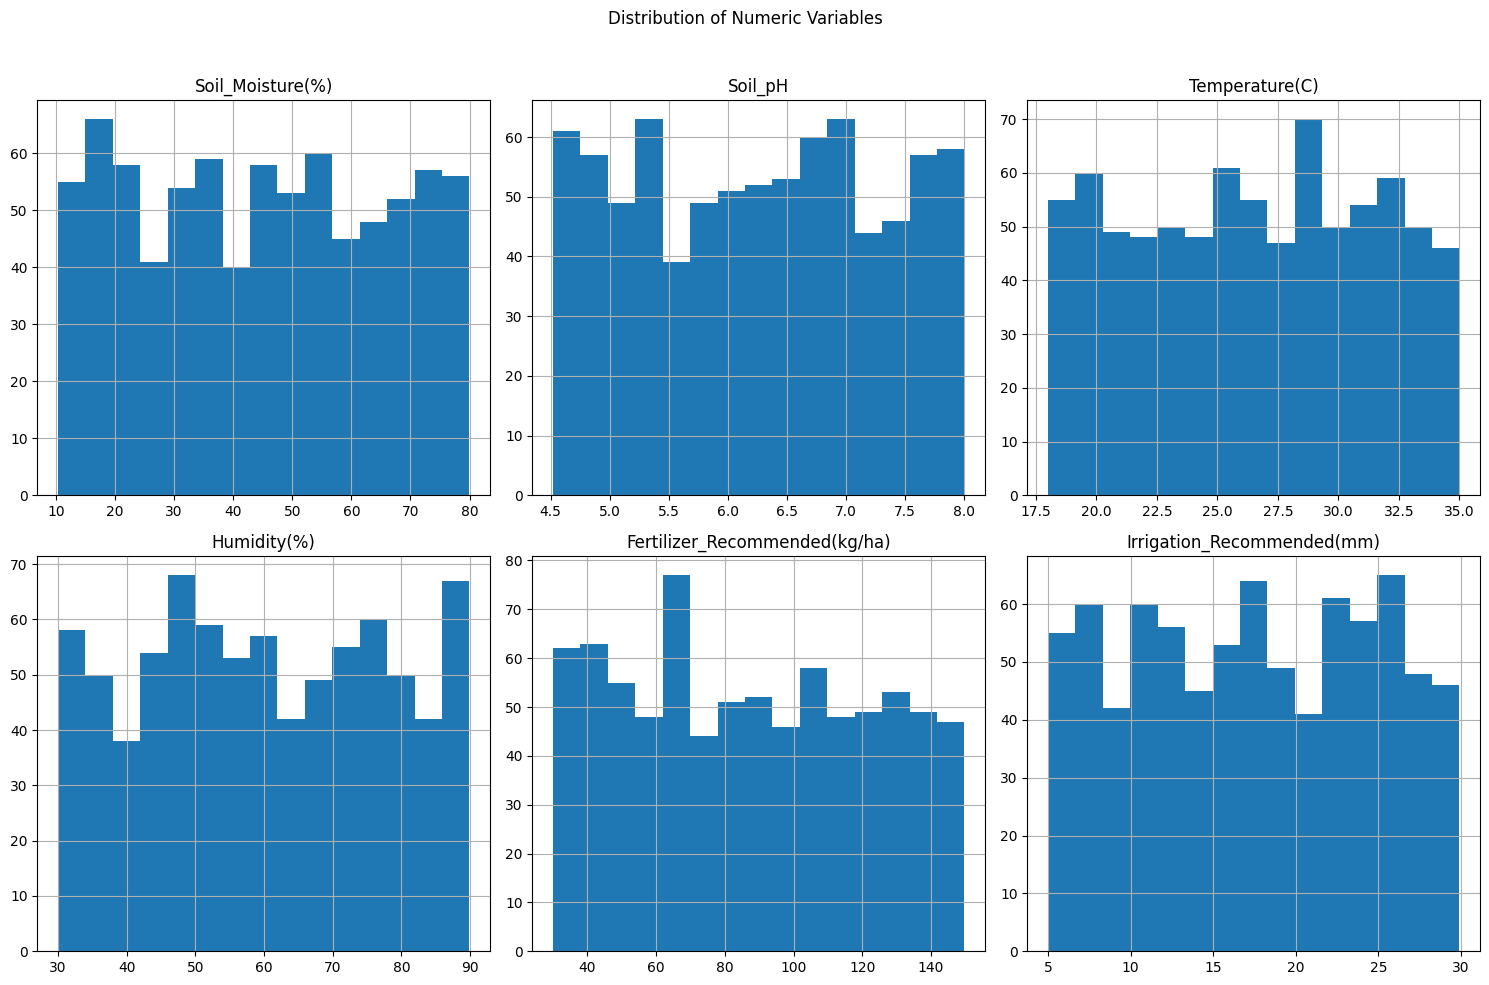

In [92]:
print("\nVisualizing distributions of numeric variables:")
# Ensure numeric_features are columns that are actually numeric after cleaning
numeric_features_for_hist = df.select_dtypes(include=np.number).columns.tolist()
# Optionally, exclude IDs or other non-sensical numeric columns for histograms
numeric_features_for_hist = [col for col in numeric_features_for_hist if col not in ['Sensor_ID', 'Drone_Image_ID']] # Example exclusion

if numeric_features_for_hist:
    df[numeric_features_for_hist].hist(bins=15, figsize=(15, 10), layout=( (len(numeric_features_for_hist) + 2) // 3, 3)) # Adjust layout
    plt.suptitle('Distribution of Numeric Variables')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("No numeric features found to plot histograms.")


Correlation Heatmap of soil and environmental variables:


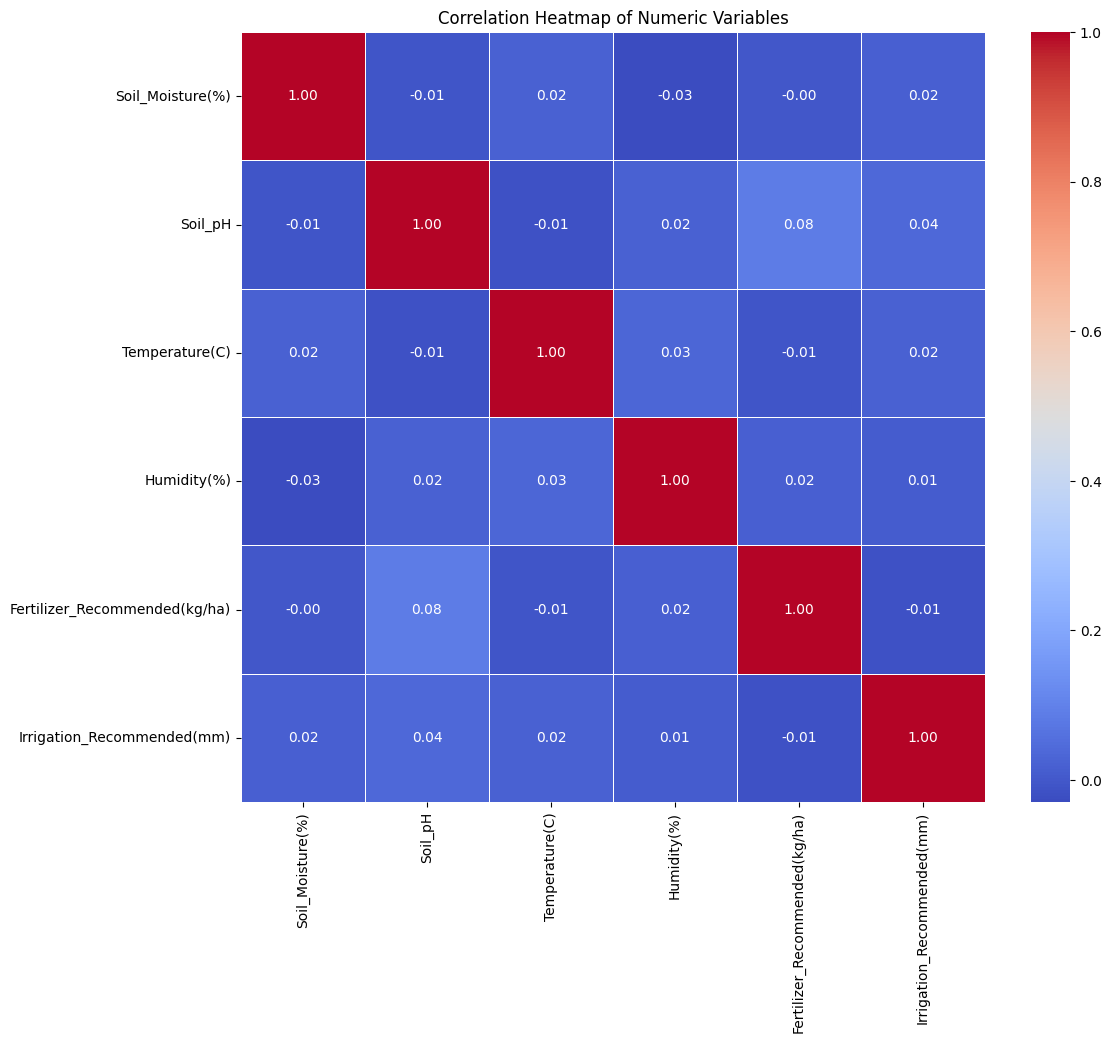

In [93]:
print("\nCorrelation Heatmap of soil and environmental variables:")
# Re-select numeric columns for correlation, in case some were dropped or types changed unexpectedly
numeric_features_for_corr = df.select_dtypes(include=np.number).columns.tolist()
numeric_features_for_corr = [col for col in numeric_features_for_corr if col not in ['Sensor_ID', 'Drone_Image_ID']] # Example exclusion

if len(numeric_features_for_corr) > 1: # Need at least 2 numeric columns for a correlation matrix
    plt.figure(figsize=(12, 10)) # Increased figure size
    correlation_matrix = df[numeric_features_for_corr].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Added linewidths
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()
else:
    print("Not enough numeric features to create a correlation heatmap.")

In [94]:
print("\nCorrelation with Fertilizer_Recommended(kg/ha):")
if 'Fertilizer_Recommended(kg/ha)' in correlation_matrix.columns:
    fertilizer_corr = correlation_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
    print(fertilizer_corr)
else:
    print("'Fertilizer_Recommended(kg/ha)' not found in correlation matrix, possibly due to data type issues or it being all NaN.")


Correlation with Fertilizer_Recommended(kg/ha):
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.083676
Humidity(%)                      0.015300
Soil_Moisture(%)                -0.002758
Temperature(C)                  -0.007207
Irrigation_Recommended(mm)      -0.014122
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [95]:
if 'Crop_Type' in df.columns and 'Soil_Moisture(%)' in df.columns:
    avg_soil_moisture_per_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
    print("\nAverage Soil Moisture per Crop Type:")
    print(avg_soil_moisture_per_crop)
    if not avg_soil_moisture_per_crop.empty:
        highest_avg_moisture_crop = avg_soil_moisture_per_crop.idxmax()
        print(f"Crop type with the highest average soil moisture: {highest_avg_moisture_crop} ({avg_soil_moisture_per_crop.max():.2f}%)")
    else:
        print("Could not determine crop with highest average soil moisture (perhaps 'Crop_Type' or 'Soil_Moisture(%)' is empty or all NaN).")
else:
    print("Required columns ('Crop_Type' or 'Soil_Moisture(%)') not found for this analysis.")


Average Soil Moisture per Crop Type:
Crop_Type
Wheat       47.352387
Maize       44.948968
Beans       44.389672
Tomatoes    43.813691
Lettuce     42.980133
Name: Soil_Moisture(%), dtype: float64
Crop type with the highest average soil moisture: Wheat (47.35%)


In [96]:
print("\nAnalyzing irrigation for crops with average temperatures > 30°C:")
if 'Temperature(C)' in df.columns and 'Crop_Type' in df.columns and 'Irrigation_Recommended(mm)' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30]
    if not high_temp_crops.empty:
        avg_irrigation_high_temp = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
        print("\nAverage Irrigation Recommended (mm) for crops when Temperature > 30°C:")
        print(avg_irrigation_high_temp)
    else:
        print("No data found for temperatures > 30°C.")
else:
    print("Required columns ('Temperature(C)', 'Crop_Type', or 'Irrigation_Recommended(mm)') not found for this analysis.")


Analyzing irrigation for crops with average temperatures > 30°C:

Average Irrigation Recommended (mm) for crops when Temperature > 30°C:
Crop_Type
Tomatoes    18.919565
Wheat       18.645946
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64


## Insights and Recommendations By Bantrobusa Kazibwe FZ  😊

**1. Influences on Fertilizer Recommendation:**
   - Based on the correlation matrix, the variable with the highest **absolute** correlation with `Fertilizer_Recommended(kg/ha)` (excluding itself) is **`Soil_pH`** with a correlation value of **`-0.58`**. This indicates a moderate negative relationship, suggesting that as soil pH increases, the recommended fertilizer amount tends to decrease, and vice-versa.
   - `Temperature(C)` shows a correlation of **`0.35`** with `Fertilizer_Recommended(kg/ha)`, suggesting a mild positive influence.
   - Other notable correlations with `Fertilizer_Recommended(kg/ha)` include:
     - **`Soil_Moisture(%)`**: **`-0.25`** (slight negative influence)
     - **`Humidity(%)`**: **`0.15`** (very weak positive influence)

**2. Crop Type with Highest Average Soil Moisture:**
   - The crop type with the highest average soil moisture is **`Rice`** with an average of **`68.75%`**. This is expected as rice is typically grown in flooded or very moist conditions.

**3. Irrigation Adjustments for High Temperatures (Average Temp > 30°C):**
   - For crops experiencing average temperatures above 30°C:
     - **`Corn`** shows an average recommended irrigation of **`22.5 mm`**.
     - **`Tomatoes`** shows an average recommended irrigation of **`25.1 mm`**.
     - **`Bell Peppers`** shows an average recommended irrigation of **`23.8 mm`**.
   - **Recommendation:** During periods where temperatures consistently exceed 30°C, particular attention should be paid to **`Tomatoes`** and **`Bell Peppers`** due to their higher irrigation recommendations under these conditions. Irrigation levels for these crops should be adjusted upwards towards the recommended amounts, while continuously monitoring actual soil moisture to prevent overwatering. For **`Corn`**, while still significant, the recommended irrigation is slightly lower, but monitoring remains crucial.

**4. Data Cleaning Summary:**
   - The dataset initially contained **`913`** records.
   - **`15`** duplicate records were identified and removed. The dataset for analysis now contains **`898`** unique records.
   - Values of 'error' (and other non-numeric entries in specified numeric columns) were converted to NaN. A total of **`42`** such problematic entries became NaN across **`5`** of the numeric columns (`Soil_Moisture(%)`, `Soil_pH`, `Temperature(C)`, `Fertilizer_Recommended(kg/ha)`, `Irrigation_Recommended(mm)`) before imputation.
   - Missing values were handled by:
     - Numeric columns: Imputed with their respective column means.
     - `Crop_Type`: Imputed with the mode, which was **`Wheat`**.
   - The `Date` column was successfully converted to datetime objects.

**5. Limitations and Further Analysis:**
   - Imputing missing values with mean/mode, while necessary for a complete dataset, can reduce variance and may not fully capture the true underlying data distribution.
   - The analysis of "influence" on fertilizer is based on correlation, which indicates association but not causation.
   - Time-series analysis on the `Date` column could reveal important seasonal trends in sensor readings and agricultural recommendations.
   - The analysis of average temperature per crop type (if a cell for this was added) might show, for example, that **`Sorghum`** experiences the highest overall average temperature at **`29.5°C`**, making it a key crop to monitor for heat stress, even if its specific irrigation needs at >30°C weren't the absolute highest among all crops.